In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Flatten, Conv2D, Input, Dense, Dropout
from tensorflow.keras.models import Model

In [ ]:
cifar10 = tf.keras.datasets.cifar10

In [ ]:
(X_train, Y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train = X_train / 255
x_test = x_test / 255

In [ ]:
import numpy as np
Y_train = np.squeeze(Y_train, axis = -1)
y_test = np.squeeze(y_test, axis = -1)

In [ ]:
print(y_test.shape)
print(Y_train.shape)

(10000,)
(50000,)


In [ ]:
k = len(set(Y_train))
print('number of output nodes: ', k)

number of output nodes:  10


In [ ]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
print(x.shape)
x = Flatten()(x)
print(x.shape)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

(None, 3, 3, 128)
(None, 1152)


In [ ]:
model = Model(i,x)

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [ ]:
r = model.fit(X_train, Y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.6566 - accuracy: 0.3918 - val_loss: 1.3415 - val_accuracy: 0.5145
Epoch 2/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3380 - accuracy: 0.5149 - val_loss: 1.2016 - val_accuracy: 0.5709
Epoch 3/15
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2209 - accuracy: 0.5617 - val_loss: 1.0738 - val_accuracy: 0.6217
Epoch 4/15
1563/1563 [==============================] - 27s 18ms/step - loss: 1.1431 - accuracy: 0.5931 - val_loss: 1.0176 - val_accuracy: 0.6410
Epoch 5/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0810 - accuracy: 0.6144 - val_loss: 0.9973 - val_accuracy: 0.6508
Epoch 6/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0276 - accuracy: 0.6337 - val_loss: 0.9346 - val_accuracy: 0.6709
Epoch 7/15
1563/1563 [==============================] - 27s 18ms/step - loss: 0.9853 - accuracy: 0.6494 - val_loss: 0.9015 -

In [ ]:
import matplotlib.pyplot as plt


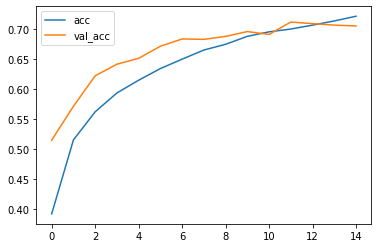

In [ ]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

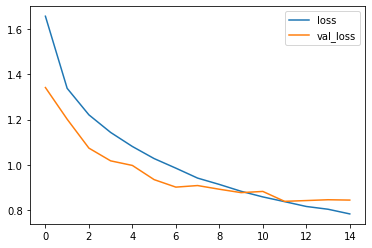

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [ ]:
predictions = model.predict(x_test)
predictions = predictions.argmax(axis = 1)
predictions.shape

(10000,)

In [ ]:
tf.math.confusion_matrix(y_test, predictions)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[719,  28,  24,  16,  14,   5,   9,  16,  97,  72],
       [ 16, 799,   4,   5,   4,   2,   6,   2,  30, 132],
       [ 89,  11, 463,  63, 151,  81,  59,  36,  25,  22],
       [ 31,  14,  46, 486,  82, 204,  40,  49,  16,  32],
       [ 24,   3,  34,  53, 680,  35,  36, 115,  14,   6],
       [ 17,   5,  43, 153,  61, 606,  11,  70,  14,  20],
       [ 11,  10,  28,  85,  97,  26, 709,  11,  11,  12],
       [ 10,   4,  28,  28,  52,  54,   5, 775,   4,  40],
       [ 39,  28,   7,   9,  11,   2,   5,   5, 853,  41],
       [ 19,  74,   5,   9,   5,   5,   6,  12,  22, 843]], dtype=int32)>